In [571]:
import pandas as pd
import numpy as np
import random
import datetime

import time
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas import read_csv
from datetime import datetime
from math import sqrt
from numpy import concatenate
from pandas import concat


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [625]:
path = '/Users/juaneugeniodebenedetti/Documents/Eugenio/Data Science/Master Brunel/learning develpment/LabelleTweetsRaw/'
#tweetFileData='my_file.csv'
#tweetDataRow = pd.read_csv(path + tweetFileData, sep=',', encoding='utf-16')
tweetFileData='tweets.csv'
tweetDataRow = pd.read_csv(path + tweetFileData, sep=',')


/Users/juaneugeniodebenedetti/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [632]:
tweetData = tweetDataRow.drop(['indices','User','Tweet'], axis=1)
timeFormat = list()
tweetData = tweetData.dropna()
for i in tweetData['Created_at']:
    timeFormat.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(i,'%a %b %d %H:%M:%S +0000 %Y')))
tweetData['Created_at'] = timeFormat
tweetData['Created_at']  = pd.to_datetime(tweetData['Created_at'])

In [633]:
tweetData

,Created_at,label
0,2019-03-16 02:33:50,1.0
1,2019-03-16 02:33:54,1.0
2,2019-03-16 02:33:57,2.0
3,2019-03-16 02:34:00,2.0
4,2019-03-16 02:34:01,1.0
5,2019-03-16 02:34:00,2.0
6,2019-03-16 02:34:05,1.0
7,2019-03-16 02:34:07,1.0
8,2019-03-16 02:34:07,1.0
9,2019-03-16 02:34:08,1.0


In [634]:
[startDate, endDate ] = [min(tweetData['Created_at']), max(tweetData['Created_at'])]
startDate = startDate.replace(minute=0,second=0)
endDate = endDate.replace(minute = 59, second = 59)

In [635]:
timeInterval = np.arange(startDate,endDate,timedelta(hours=1))

In [636]:
columnTimeInterval =  list()
columnNegatives = list()
columnNeutrals = list()
columnPositives = list()

for i in np.arange(1,len(timeInterval)):
    indexes1 = tweetData['Created_at'] > timeInterval[i-1] 
    indexes2 = tweetData['Created_at'] < timeInterval[i] 
    indexes = indexes1 & indexes2
    qtyZeros = sum(tweetData['label'].loc[indexes] == 0)
    qtyOnes =  sum(tweetData['label'].loc[indexes] == 1)
    qtyTwo =  sum(tweetData['label'].loc[indexes] == 2)
    columnNegatives.append(qtyZeros)
    columnNeutrals.append(qtyOnes)
    columnPositives.append(qtyTwo)
    columnTimeInterval.append(timeInterval[i-1])
processTwits_df = pd.DataFrame(
    {'Date': columnTimeInterval,
     'Negatives': columnNegatives,
     'Neutrals': columnNeutrals,
     'Positives': columnPositives,
    })
processTwits_df = processTwits_df.set_index('Date')


In [638]:
processTwits_df

,Negatives,Neutrals,Positives
Date,,,
2019-03-16 02:00:00,54,508,250
2019-03-16 03:00:00,79,1423,603
2019-03-16 04:00:00,123,1403,746
2019-03-16 05:00:00,136,1384,641
2019-03-16 06:00:00,94,1364,664
2019-03-16 07:00:00,116,1654,775
2019-03-16 08:00:00,96,1684,694
2019-03-16 09:00:00,78,1313,591
2019-03-16 10:00:00,0,0,0


In [639]:
bitcoinFileData='gemini_BTCUSD_1hr.csv'
bitcoinDataRow = pd.read_csv(path + bitcoinFileData, sep=',')
bitcoinDataRow = bitcoinDataRow.drop(['Unix Timestamp','Symbol','Open','High','Low'], axis=1)
bitcoinDataRow['Date']  = pd.to_datetime(bitcoinDataRow['Date'])
bitcoinDataRow = bitcoinDataRow.set_index('Date')
bitcoinDataRow.head()

,Close,Volume
Date,,
2019-03-26 00:00:00,3909.96,1.750803
2019-03-25 23:00:00,3908.70,567.489488
2019-03-25 22:00:00,3905.00,106.912821
2019-03-25 21:00:00,3886.49,56.749405
2019-03-25 20:00:00,3888.52,203.308840


In [640]:

# create a log return series from a stock value
def stockVAlue2Return(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = (dataset[i] - dataset[i - interval])
		diff.append(value)
	return pd.Series(diff)


In [646]:
returnValues = stockVAlue2Return(bitcoinDataRow['Close'].values)
bitcoinDataRow = bitcoinDataRow.drop(bitcoinDataRow.index[0],axis = 0)
bitcoinDataRow.loc[:,'Return'] = pd.Series(returnValues.values, index=bitcoinDataRow.index)
bitcoinDataRow.head()

,Close,Volume,Return
Date,,,
2019-03-25 22:00:00,3905.00,106.912821,-3.70
2019-03-25 21:00:00,3886.49,56.749405,-18.51
2019-03-25 20:00:00,3888.52,203.308840,2.03
2019-03-25 19:00:00,3899.99,288.996993,11.47
2019-03-25 18:00:00,3893.72,174.746815,-6.27


In [647]:
timeSeriesData = processTwits_df.join(bitcoinDataRow)

In [648]:
timeSeriesData = timeSeriesData.drop(['Volume','Close'], axis=1)
timeSeriesData.head()

,Negatives,Neutrals,Positives,Return
Date,,,,
2019-03-16 02:00:00,54,508,250,-23.57
2019-03-16 03:00:00,79,1423,603,-58.43
2019-03-16 04:00:00,123,1403,746,8.40
2019-03-16 05:00:00,136,1384,641,2.67
2019-03-16 06:00:00,94,1364,664,1.03


3. Multivariate LSTM Forecast Model
In this section, we will fit an LSTM to the problem.

LSTM Data Preparation
The first step is to prepare the pollution dataset for the LSTM.

This involves framing the dataset as a supervised learning problem and normalizing the input variables.

We will frame the supervised learning problem as predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step.

This formulation is straightforward and just for this demonstration. Some alternate formulations you could explore include:

Predict the pollution for the next hour based on the weather conditions and pollution over the last 24 hours.
Predict the pollution for the next hour as above and given the “expected” weather conditions for the next hour.
We can transform the dataset using the series_to_supervised() function developed in the blog post:

How to Convert a Time Series to a Supervised Learning Problem in Python
First, the “pollution.csv” dataset is loaded. The wind speed feature is label encoded (integer encoded). This could further be one-hot encoded in the future if you are interested in exploring it.

Next, all features are normalized, then the dataset is transformed into a supervised learning problem. The weather variables for the hour to be predicted (t) are then removed.



In [649]:
# convert series to supervised learning
def series_to_supervised(data, columnName,n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(columnName[j]+'%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [(columnName[j]+'%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [(columnName[j]+'%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [650]:
# load dataset
values = timeSeriesData.values
# normalize features
#[f,c] = values.shape
#for i in np.arange(0,c):
#    values[:,i] = values[:,i] / np.linalg.norm(values[:,i])
   

# ensure all data is float
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning

windwosSize = 3
columNames = timeSeriesData.columns.values
# frame as supervised learning
reframed = series_to_supervised(scaled,columNames, windwosSize, 1)
# drop columns we don't want to predict
[nrowScaled,nvariables] = scaled.shape
[nrowreframed,ncolreframed] = reframed.shape
rows2Drop = np.arange(ncolreframed-nvariables,ncolreframed-1)
reframed.drop(reframed.columns[rows2Drop], axis=1, inplace=True)
print(reframed.head())

   Negatives1(t-3)  Neutrals2(t-3)  Positives3(t-3)  Return4(t-3)  \
3         0.200743        0.170814         0.208333      0.243266   
4         0.293680        0.478480         0.502500      0.000000   
5         0.457249        0.471755         0.621667      0.466364   
6         0.505576        0.465366         0.534167      0.426378   
7         0.349442        0.458642         0.553333      0.414934   

   Negatives1(t-2)  Neutrals2(t-2)  Positives3(t-2)  Return4(t-2)  \
3         0.293680        0.478480         0.502500      0.000000   
4         0.457249        0.471755         0.621667      0.466364   
5         0.505576        0.465366         0.534167      0.426378   
6         0.349442        0.458642         0.553333      0.414934   
7         0.431227        0.556153         0.645833      0.441382   

   Negatives1(t-1)  Neutrals2(t-1)  Positives3(t-1)  Return4(t-1)  Return4(t)  
3         0.457249        0.471755         0.621667      0.466364    0.426378  
4         

Define and Fit Model
In this section, we will fit an LSTM on the multivariate input data.

First, we must split the prepared dataset into train and test sets. To speed up the training of the model for this demonstration, we will only fit the model on the first year of data, then evaluate it on the remaining 4 years of data. If you have time, consider exploring the inverted version of this test harness.

The example below splits the dataset into train and test sets, then splits the train and test sets into input and output variables. Finally, the inputs (X) are reshaped into the 3D format expected by LSTMs, namely [samples, timesteps, features].

In [655]:
[nRowReframed, nColReframed] = reframed.shape
# split into train and test sets
values = reframed.values
n_train_hours = int(nRowReframed * .80)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(104, 1, 12) (104,) (26, 1, 12) (26,)


Now we can define and fit our LSTM model.

We will define the LSTM with 50 neurons in the first hidden layer and 1 neuron in the output layer for predicting pollution. The input shape will be 1 time step with 8 features.

We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

The model will be fit for 50 training epochs with a batch size of 72. Remember that the internal state of the LSTM in Keras is reset at the end of each batch, so an internal state that is a function of a number of days may be helpful (try testing this).

Finally, we keep track of both the training and test loss during training by setting the validation_data argument in the fit() function. At the end of the run both the training and test loss are plotted.

Train on 104 samples, validate on 26 samples
Epoch 1/500
 - 3s - loss: 0.4008 - val_loss: 0.2885
Epoch 2/500
 - 0s - loss: 0.2792 - val_loss: 0.1558
Epoch 3/500
 - 0s - loss: 0.1573 - val_loss: 0.0816
Epoch 4/500
 - 0s - loss: 0.0822 - val_loss: 0.1512
Epoch 5/500
 - 0s - loss: 0.1062 - val_loss: 0.2031
Epoch 6/500
 - 0s - loss: 0.1288 - val_loss: 0.2035
Epoch 7/500
 - 0s - loss: 0.1242 - val_loss: 0.1700
Epoch 8/500
 - 0s - loss: 0.1021 - val_loss: 0.1248
Epoch 9/500
 - 0s - loss: 0.0792 - val_loss: 0.0908
Epoch 10/500
 - 0s - loss: 0.0701 - val_loss: 0.0821
Epoch 11/500
 - 0s - loss: 0.0839 - val_loss: 0.0884
Epoch 12/500
 - 0s - loss: 0.0942 - val_loss: 0.0864
Epoch 13/500
 - 0s - loss: 0.0889 - val_loss: 0.0801
Epoch 14/500
 - 0s - loss: 0.0766 - val_loss: 0.0872
Epoch 15/500
 - 0s - loss: 0.0699 - val_loss: 0.0991
Epoch 16/500
 - 0s - loss: 0.0713 - val_loss: 0.1046
Epoch 17/500
 - 0s - loss: 0.0727 - val_loss: 0.1022
Epoch 18/500
 - 0s - loss: 0.0705 - val_loss: 0.0935
Epoch 19/5

Epoch 154/500
 - 0s - loss: 0.0465 - val_loss: 0.0735
Epoch 155/500
 - 0s - loss: 0.0460 - val_loss: 0.0744
Epoch 156/500
 - 0s - loss: 0.0461 - val_loss: 0.0740
Epoch 157/500
 - 0s - loss: 0.0464 - val_loss: 0.0735
Epoch 158/500
 - 0s - loss: 0.0457 - val_loss: 0.0750
Epoch 159/500
 - 0s - loss: 0.0468 - val_loss: 0.0745
Epoch 160/500
 - 0s - loss: 0.0465 - val_loss: 0.0729
Epoch 161/500
 - 0s - loss: 0.0458 - val_loss: 0.0741
Epoch 162/500
 - 0s - loss: 0.0458 - val_loss: 0.0740
Epoch 163/500
 - 0s - loss: 0.0461 - val_loss: 0.0729
Epoch 164/500
 - 0s - loss: 0.0455 - val_loss: 0.0743
Epoch 165/500
 - 0s - loss: 0.0459 - val_loss: 0.0741
Epoch 166/500
 - 0s - loss: 0.0461 - val_loss: 0.0730
Epoch 167/500
 - 0s - loss: 0.0455 - val_loss: 0.0737
Epoch 168/500
 - 0s - loss: 0.0453 - val_loss: 0.0744
Epoch 169/500
 - 0s - loss: 0.0458 - val_loss: 0.0733
Epoch 170/500
 - 0s - loss: 0.0459 - val_loss: 0.0728
Epoch 171/500
 - 0s - loss: 0.0450 - val_loss: 0.0745
Epoch 172/500
 - 0s - loss: 

Epoch 306/500
 - 0s - loss: 0.0420 - val_loss: 0.0693
Epoch 307/500
 - 0s - loss: 0.0426 - val_loss: 0.0690
Epoch 308/500
 - 0s - loss: 0.0426 - val_loss: 0.0684
Epoch 309/500
 - 0s - loss: 0.0422 - val_loss: 0.0688
Epoch 310/500
 - 0s - loss: 0.0420 - val_loss: 0.0697
Epoch 311/500
 - 0s - loss: 0.0429 - val_loss: 0.0687
Epoch 312/500
 - 0s - loss: 0.0424 - val_loss: 0.0686
Epoch 313/500
 - 0s - loss: 0.0419 - val_loss: 0.0692
Epoch 314/500
 - 0s - loss: 0.0424 - val_loss: 0.0690
Epoch 315/500
 - 0s - loss: 0.0424 - val_loss: 0.0685
Epoch 316/500
 - 0s - loss: 0.0421 - val_loss: 0.0686
Epoch 317/500
 - 0s - loss: 0.0419 - val_loss: 0.0690
Epoch 318/500
 - 0s - loss: 0.0423 - val_loss: 0.0685
Epoch 319/500
 - 0s - loss: 0.0421 - val_loss: 0.0684
Epoch 320/500
 - 0s - loss: 0.0419 - val_loss: 0.0689
Epoch 321/500
 - 0s - loss: 0.0422 - val_loss: 0.0683
Epoch 322/500
 - 0s - loss: 0.0424 - val_loss: 0.0680
Epoch 323/500
 - 0s - loss: 0.0417 - val_loss: 0.0693
Epoch 324/500
 - 0s - loss: 

Epoch 458/500
 - 0s - loss: 0.0415 - val_loss: 0.0672
Epoch 459/500
 - 0s - loss: 0.0414 - val_loss: 0.0673
Epoch 460/500
 - 0s - loss: 0.0415 - val_loss: 0.0671
Epoch 461/500
 - 0s - loss: 0.0414 - val_loss: 0.0675
Epoch 462/500
 - 0s - loss: 0.0418 - val_loss: 0.0670
Epoch 463/500
 - 0s - loss: 0.0415 - val_loss: 0.0673
Epoch 464/500
 - 0s - loss: 0.0416 - val_loss: 0.0670
Epoch 465/500
 - 0s - loss: 0.0415 - val_loss: 0.0671
Epoch 466/500
 - 0s - loss: 0.0415 - val_loss: 0.0670
Epoch 467/500
 - 0s - loss: 0.0416 - val_loss: 0.0672
Epoch 468/500
 - 0s - loss: 0.0415 - val_loss: 0.0670
Epoch 469/500
 - 0s - loss: 0.0416 - val_loss: 0.0671
Epoch 470/500
 - 0s - loss: 0.0413 - val_loss: 0.0673
Epoch 471/500
 - 0s - loss: 0.0419 - val_loss: 0.0669
Epoch 472/500
 - 0s - loss: 0.0414 - val_loss: 0.0674
Epoch 473/500
 - 0s - loss: 0.0418 - val_loss: 0.0670
Epoch 474/500
 - 0s - loss: 0.0414 - val_loss: 0.0673
Epoch 475/500
 - 0s - loss: 0.0417 - val_loss: 0.0670
Epoch 476/500
 - 0s - loss: 

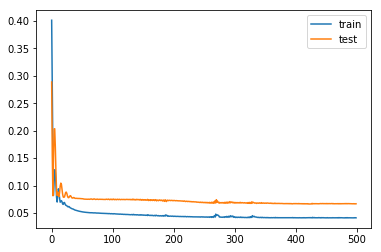

In [656]:
	
# design network
model = Sequential()
model.add(LSTM(500, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()





Evaluate Model
After the model is fit, we can forecast for the entire test dataset.

We combine the forecast with the test dataset and invert the scaling. We also invert scaling on the test dataset with the expected pollution numbers.

With forecasts and actual values in their original scale, we can then calculate an error score for the model. In this case, we calculate the Root Mean Squared Error (RMSE) that gives error in the same units as the variable itself.

In [683]:

yhat = model.predict(test_X)
test_XReshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))
test_XReshaped[:, 0:nvariables-1].shape
inv_yhat = concatenate((test_XReshaped[:, 0:nvariables-1],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)


In [685]:
# make a prediction
yhat = model.predict(test_X)
test_XReshaped = test_X.reshape((test_X.shape[0], test_X.shape[2]))


# invert scaling for forecast
inv_yhat = concatenate((test_XReshaped[:, 0:nvariables-1],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,3]
# invert scaling for actual
test_yReshaped = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_XReshaped[:, 0:nvariables-1],test_yReshaped), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,3]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 19.007


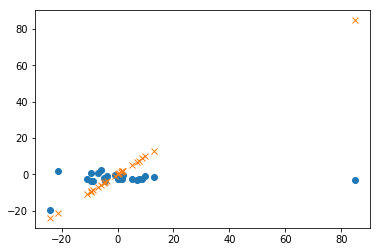

In [687]:
plt.plot(inv_y,inv_yhat,'o')
plt.plot(inv_y,inv_y,'x')

In [688]:
temp_df = pd.DataFrame(
    {'Actual t': inv_y,
     'y Hat': inv_yhat
    })
temp_df

,Actual t,y Hat
0,-3.820002,-1.197928
1,1.610001,-2.460723
2,-4.510001,-3.500397
3,7.529999,-2.398307
4,-10.950001,-2.742882
5,-5.770000,2.314807
6,1.630000,-1.547816
7,2.030000,-0.607768
8,-21.200001,1.779307
9,-0.760000,-0.595691
